In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, 0]
y = df.iloc[:, 1]
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3.0, random_state=0)
# you ought to do this when there is only a single feature. This is because the API expects 2D array. 
X_train = X_train.values.reshape(-1, 1)

## Simple Linear Regression


In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [7]:
y_pred

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

In [8]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
22    101302.0
Name: Salary, dtype: float64

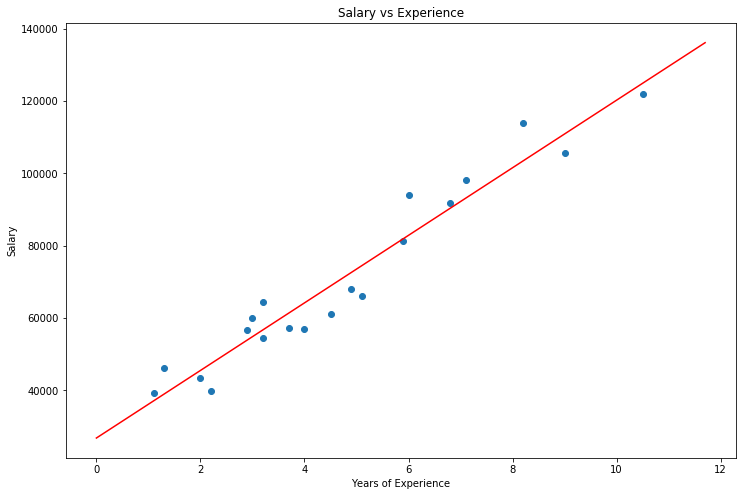

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(np.arange(0, 12, 0.3), regressor.predict(np.arange(0, 12, 0.3).reshape(-1, 1)), color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Fitting model

#### P value: 
P value helps to determine the significance of the result and is used in Hypothesis testing. The hypothesis under testing is called Null Hypothesis. The lower the P value, the better the model. In short, p value tells the scope of the error, eg. if the P value is 0.02 then there is 2% chances that the claims made might not hold true. Typically, the limit of P value is set to 5%

### Backward Elimination

1. Set Signifance level. Say, SL = 0.05
2. Fit model with all possible predictors. 
3. Check the highest P values, if any one of them is greater than SL then, remove the variable and rebuild model.
4. Repeat until no P value is greater than SL. 

### Forward Elimination
1. Set Significance level. Say, SL = 0.05
2. Make a model for every variable, choose one whose addition gives highest significance level. 
3. Repeat until no additional variable additional is significant. 

### Bidirectional Elimination
1. Set Signifiance level of entering and staying. SLEnter = 0.05, SLStay = 0.05
2. Perform one step of forward elimination. New variables must have P < SLEnter
3. Perform all step of backward elimination. Variables should have P < SLStay to stay.
4. Repeat till equilibrium.

### All Possible model
1. Select criterion of fitness (eg. Akaine criterion) 
2. Create one tree for every possible $2^n - 1$ combinations
3. Select one with best p 


## Multiple Linear Regression

In [48]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
X = df.iloc[:, :-1]
y = df['Profit']

In [50]:
# one hot encode "State" column
X = pd.get_dummies(X, columns=['State'])


In [51]:
# Avoid dummy variable trap, remove last column
X = X.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0.0,0.0
1,162597.70,151377.59,443898.53,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0
3,144372.41,118671.85,383199.62,0.0,0.0
4,142107.34,91391.77,366168.42,0.0,1.0


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
y_pred = regressor.predict(X_test)
print y_pred
print y_test

[ 101818.58738692  135528.6007816   135664.64259063   74956.31104908
  182276.18673284  114279.80403011   69606.52160903   97617.29632021
  114833.30513844  172277.13381667]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64
